In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install my_module

Note: you may need to restart the kernel to use updated packages.


In [16]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from keras.callbacks import ReduceLROnPlateau



In [4]:
print(os.listdir("D:\project"))


print(len(os.listdir("D:\project\dataset")))
print(os.listdir("D:\project\dataset")[:25])



['code', 'dataset', 'model_resnet50.h5', 'model_VGG16.h5', 'RESNET50_CPD_class_indices.csv', 'RESNET50_CPD_class_indices.json', 'VGG_CPD_class_indices.csv', 'VGG_CPD_class_indices.json']
32
['Cauliflower___Bacterial_spot_rot', 'Cauliflower___Black_Rot', 'Cauliflower___Downy_Mildew', 'Cauliflower___Healthy', 'Corn___Blight', 'Corn___Common_Rust', 'Corn___Gray_Leaf_Spot', 'Corn___Healthy', 'Potato___Bacterial_Wilt', 'Potato___Blight', 'Potato___Healthy', 'Rice___Bacterial_Leaf_Blight', 'Rice___Brown_Spot', 'Rice___Healthy', 'Rice___Hispa', 'Rice___Leaf_Blast', 'Rice___Leaf_scald', 'Rice___Sheath_Blight', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite']


In [5]:
print(len(os.listdir("D:\project\dataset\Cauliflower___Healthy")))
print(os.listdir("D:\project\dataset\Cauliflower___Healthy")[:5])

1595
['Disease Free. (1).jpg', 'Disease Free. (10).jpg', 'Disease Free. (1000).jpg', 'Disease Free. (1001).jpg', 'Disease Free. (1005).jpg']


In [6]:
# Dataset Path
base_dir = 'D:\project\dataset'

(256, 256, 3)


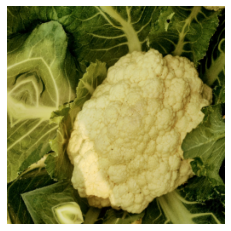

In [7]:
image_path = 'D:\project\dataset\Cauliflower___Healthy/Disease Free. (1).jpg'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [8]:
image_path = 'D:\project\dataset\Cauliflower___Healthy/Disease Free. (1).jpg'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[0.1254902  0.16470589 0.01568628]
  [0.14509805 0.18039216 0.01176471]
  [0.15294118 0.1882353  0.00392157]
  ...
  [0.69803923 0.64705884 0.3372549 ]
  [0.67058825 0.6039216  0.28627452]
  [0.6666667  0.59607846 0.29803923]]

 [[0.14509805 0.18431373 0.00784314]
  [0.1764706  0.21568628 0.01960784]
  [0.16862746 0.20784314 0.01960784]
  ...
  [0.627451   0.57254905 0.25882354]
  [0.5647059  0.49019608 0.18431373]
  [0.5294118  0.45882353 0.1764706 ]]

 [[0.25490198 0.28627452 0.05882353]
  [0.1882353  0.22745098 0.02352941]
  [0.14509805 0.18039216 0.00392157]
  ...
  [0.40784314 0.34117648 0.08235294]
  [0.32941177 0.28235295 0.05098039]
  [0.19215687 0.17254902 0.01568628]]

 ...

 [[0.7607843  0.72156864 0.31764707]
  [0.7176471  0.6784314  0.27058825]
  [0.7176471  0.67058825 0.29803923]
  ...
  [0.10980392 0.17254902 0.01960784]
  [0.10588235 0.16862746 0.02352941]
  [0.1254902  0.18431373 0.02745098]]

 [[0.7921569  0.7529412  0.36862746]
  [0.74509805 0.69411767 0.2901961 ]


In [9]:
# Image Parameters
img_size = 224
batch_size = 32

In [10]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [11]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 27623 images belonging to 32 classes.


In [12]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 6890 images belonging to 32 classes.


In [13]:

def create_Base_model_from_VGG16():
    model = VGG16(
        weights = "imagenet",
        include_top=False,
        input_shape = (224,224, 3) # goruntu boyutu
        )
    for layer in model.layers:
      layer.trainable = False
    return model
create_Base_model_from_VGG16().summary()




Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [14]:
num_classes = 32
def add_custom_layers():
    model = create_Base_model_from_VGG16()
    x = model.output
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    predictions = tf.keras.layers.Dense(num_classes, activation="softmax")(x)
    # creating the final model
    final_model = tf.keras.models.Model(
        inputs = model.input,
        outputs = predictions)

    final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return final_model

add_custom_layers().summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0    

In [19]:
model_from_vgg16 = add_custom_layers()
history2 = model_from_vgg16.fit(
    train_generator,
    steps_per_epoch=None,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=None,
    verbose=1,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
    use_multiprocessing=False,
    shuffle=True
    )

Epoch 1/5


864/864 [==============================] - 9113s 11s/step - loss: 1.1143 - accuracy: 0.6690 - val_loss: 1.3596 - val_accuracy: 0.6328 - lr: 0.0010
Epoch 2/5
864/864 [==============================] - 4830s 6s/step - loss: 0.3414 - accuracy: 0.8772 - val_loss: 1.3287 - val_accuracy: 0.6598 - lr: 0.0010
Epoch 3/5
864/864 [==============================] - 5083s 6s/step - loss: 0.2045 - accuracy: 0.9231 - val_loss: 1.3306 - val_accuracy: 0.7049 - lr: 0.0010
Epoch 4/5
864/864 [==============================] - 4813s 6s/step - loss: 0.1487 - accuracy: 0.9383 - val_loss: 1.5317 - val_accuracy: 0.7620 - lr: 0.0010
Epoch 5/5
864/864 [==============================] - 4772s 6s/step - loss: 0.1377 - accuracy: 0.9402 - val_loss: 1.9386 - val_accuracy: 0.7023 - lr: 0.0010


In [15]:
model_from_vgg16.save('D:\project/model_VGG16.h5')

NameError: name 'model_from_vgg16' is not defined

In [17]:
# Model Definition
model = models.Sequential()


# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [19]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('D:\project/model_VGG16.h5')


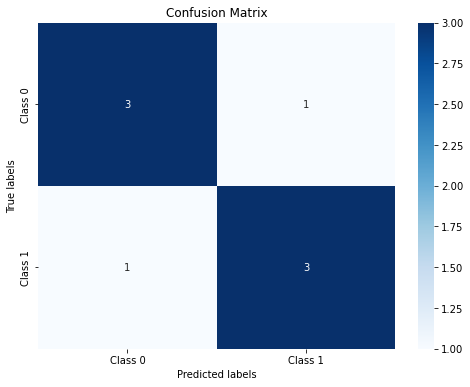

Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1 Score: 0.75


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Example ground truth and predicted labels
y_true = [0, 1, 0, 1, 1, 1, 0, 0]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [21]:
# Plot training & validation accuracy values
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'history2' is not defined

In [22]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # print(img.shape)
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers
    plt.show()
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    # Load and preprocess the image
    # Assuming you have code here to load and preprocess the image
    preprocessed_img = preprocess_image(image_path)

    # Make predictions
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    
    # Get the predicted class name from the class_indices dictionary
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [30]:
from tensorflow.keras.utils import to_categorical

class_indices = {v: k for k, v in train_generator.class_indices.items()}

# Get the number of classes
num_classes = len(class_indices)

# Perform one-hot encoding for each class index
one_hot_encoded_labels = {class_index: to_categorical(class_index, num_classes=num_classes) for class_index in class_indices}

# Display the one-hot encoded labels
for class_index, one_hot_label in one_hot_encoded_labels.items():
    print(f"Class Index: {class_index}, One-Hot Encoded Label: {one_hot_label}")

Class Index: 0, One-Hot Encoded Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Class Index: 1, One-Hot Encoded Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Class Index: 2, One-Hot Encoded Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Class Index: 3, One-Hot Encoded Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Class Index: 4, One-Hot Encoded Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Class Index: 5, One-Hot Encoded Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Class Index: 6, One-Hot Encoded Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Class Index: 7, One-Hot Encoded La

In [31]:
class_indices

{0: 'Cauliflower___Bacterial_spot_rot',
 1: 'Cauliflower___Black_Rot',
 2: 'Cauliflower___Downy_Mildew',
 3: 'Cauliflower___Healthy',
 4: 'Corn___Blight',
 5: 'Corn___Common_Rust',
 6: 'Corn___Gray_Leaf_Spot',
 7: 'Corn___Healthy',
 8: 'Potato___Bacterial_Wilt',
 9: 'Potato___Blight',
 10: 'Potato___Healthy',
 11: 'Rice___Bacterial_Leaf_Blight',
 12: 'Rice___Brown_Spot',
 13: 'Rice___Healthy',
 14: 'Rice___Hispa',
 15: 'Rice___Leaf_Blast',
 16: 'Rice___Leaf_scald',
 17: 'Rice___Sheath_Blight',
 18: 'Tomato___Bacterial_spot',
 19: 'Tomato___Early_blight',
 20: 'Tomato___Late_blight',
 21: 'Tomato___Leaf_Mold',
 22: 'Tomato___Septoria_leaf_spot',
 23: 'Tomato___Spider_mites Two-spotted_spider_mite',
 24: 'Tomato___Target_Spot',
 25: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 26: 'Tomato___Tomato_mosaic_virus',
 27: 'Tomato___healthy',
 28: 'Wheat___Healthy',
 29: 'Wheat___Mildew',
 30: 'Wheat___Rust',
 31: 'Wheat___Septorial'}

In [32]:
# saving the class names as json file
json.dump(class_indices, open('D:\project/VGG_CPD_class_indices.json', 'w'))

In [33]:
import csv

# Assuming you have a 'class_indices' dictionary

# Specify the file path for the CSV file
csv_file_path = 'D:\project/VGG_CPD_class_indices.csv'

# Save class indices as a CSV file
with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['ClassIndex', 'ClassName'])  # Write header

    for class_index, class_name in class_indices.items():
        csv_writer.writerow([class_index, class_name])


In [27]:
import json
from tensorflow.keras.utils import to_categorical

# Load class indices from the JSON file
with open('D:\project/VGG_CPD_class_indices.json', 'r') as json_file:
    loaded_class_indices = json.load(json_file)

# Get the number of classes
num_classes = len(loaded_class_indices)

# Convert class indices to integers (if needed)
loaded_class_indices_int = {int(k): v for k, v in loaded_class_indices.items()}

# Perform one-hot encoding for each loaded class index
one_hot_encoded_labels = {class_index: to_categorical(class_index, num_classes=num_classes) for class_index in loaded_class_indices_int}

# Display the one-hot encoded labels
for class_index, one_hot_label in one_hot_encoded_labels.items():
    print(f"Class Index: {class_index}, One-Hot Encoded Label: {one_hot_label.tolist()}")


Class Index: 0, One-Hot Encoded Label: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 1, One-Hot Encoded Label: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 2, One-Hot Encoded Label: [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 3, One-Hot Encoded Label: [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 4, One-Hot Encoded Label: [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [34]:
# Example Usage
image_path = "D:\\project\\dataset\\Cauliflower___Downy_Mildew\\DownyMildew. (1).jpg"
# image_path = '/content/drive/MyDrive/Project/Demo Dataset/Corn___healthy/image (1).jpg'
# image_path = '/content/drive/MyDrive/Project/Demo Dataset/Corn___Northern_Leaf_Blight/image (1).JPG'

predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

NameError: name 'preprocess_image' is not defined

# Make Prediction

In [35]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('D:\project/model_VGG16.h5')


In [36]:
import json
from tensorflow.keras.utils import to_categorical

# Load class indices from the JSON file
with open('D:\project/VGG_CPD_class_indices.json', 'r') as json_file:
    loaded_class_indices = json.load(json_file)

# Get the number of classes
num_classes = len(loaded_class_indices)

# Convert class indices to integers (if needed)
loaded_class_indices_int = {int(k): v for k, v in loaded_class_indices.items()}

# Perform one-hot encoding for each loaded class index
one_hot_encoded_labels = {class_index: to_categorical(class_index, num_classes=num_classes) for class_index in loaded_class_indices_int}

# Display the one-hot encoded labels
for class_index, one_hot_label in one_hot_encoded_labels.items():
    print(f"Class Index: {class_index}, One-Hot Encoded Label: {one_hot_label.tolist()}")


Class Index: 0, One-Hot Encoded Label: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 1, One-Hot Encoded Label: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 2, One-Hot Encoded Label: [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 3, One-Hot Encoded Label: [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 4, One-Hot Encoded Label: [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [37]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # print(img.shape)
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers
    plt.show()
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

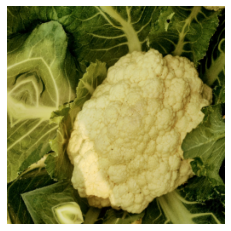

1/1 [==============================] - 1s 802ms/step
Predicted Class Name: Cauliflower___Healthy


In [38]:
# Example Usage
# image_path = '/content/drive/MyDrive/Project/NewCropsDataset/Corn___Healthy/ch12_0_134.jpg'
# image_path = '/content/drive/MyDrive/Project/NewCropsDataset/Corn___Healthy/Corn_Health (100).jpg'
image_path = "D:\\new dataset\\dataset\\Cauliflower___Healthy\\Disease Free. (1).jpg"

predicted_class_name = predict_image_class(loaded_model, image_path, loaded_class_indices_int)

# Output the result
print("Predicted Class Name:", predicted_class_name)

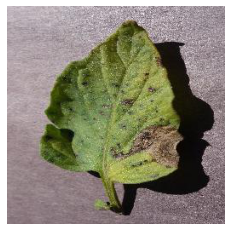

1/1 [==============================] - 0s 315ms/step
Predicted Class Name: Tomato___Early_blight


In [39]:
image_path = "D:\\new dataset\\dataset\\Tomato___Early_blight\\00e7c4b2-3005-4558-9cfa-235e356cb7a8___RS_Erly.B 7844.JPG"

predicted_class_name = predict_image_class(loaded_model, image_path, loaded_class_indices_int)

# Output the result
print("Predicted Class Name:", predicted_class_name)

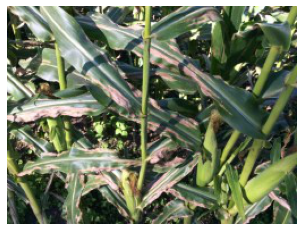

1/1 [==============================] - 0s 316ms/step
Predicted Class Name: Corn___Blight


In [40]:
image_path = "D:\project\dataset\Corn___Blight\cb1.jpeg"

predicted_class_name = predict_image_class(loaded_model, image_path, loaded_class_indices_int)

# Output the result
print("Predicted Class Name:", predicted_class_name)

# Convert Model into Tflite

In [58]:
import json
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('/content/drive/MyDrive/Project/Code/CPD_model.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model to a .tflite file
tflite_model_path = '/content/drive/MyDrive/Project/Code/converted_model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f'TensorFlow Lite model saved to: {tflite_model_path}')

# Tflite Model Prediction

In [ ]:
# Load class indices from the JSON file
with open('/content/drive/MyDrive/Project/Code/CPD_class_indices.json', 'r') as json_file:
    loaded_class_indices = json.load(json_file)

# Get the number of classes
num_classes = len(loaded_class_indices)

# Convert class indices to integers (if needed)
loaded_class_indices_int = {int(k): v for k, v in loaded_class_indices.items()}

# Perform one-hot encoding for each loaded class index
one_hot_encoded_labels = {class_index: to_categorical(class_index, num_classes=num_classes) for class_index in loaded_class_indices_int}

# Display the one-hot encoded labels
for class_index, one_hot_label in one_hot_encoded_labels.items():
    print(f"Class Index: {class_index}, One-Hot Encoded Label: {one_hot_label.tolist()}")


In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers
    plt.show()
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(interpreter, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    # Get input and output tensors
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], preprocessed_img)
    # Run inference
    interpreter.invoke()
    # Get the output
    predictions = interpreter.get_tensor(output_details[0]['index'])
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name







In [ ]:
# Load TensorFlow Lite model and allocate tensors
tflite_model_path = '/content/drive/MyDrive/Project/Code/converted_model.tflite'
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

In [59]:
# Example Usage
image_path = '/content/drive/MyDrive/Project/NewCropsDataset/Wheat___Healthy/wh1_0_5897.jpg'
predicted_class_name = predict_image_class(interpreter, image_path, loaded_class_indices_int)

# Output the result
print("Predicted Class Name:", predicted_class_name)

NameError: name 'interpreter' is not defined